**Artificial Neural Networks**
Bob has started his own mobile company. He wants to give tough fight to big companies
like Apple, Samsung etc. He does not know how to estimate price of mobiles his company
creates. In this competitive mobile phone market, you cannot simply assume things. To
solve this problem, he collects sales data of mobile phones of various companies. Bob
wants to find out some relation between features of a mobile phone

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#hist = hist.history
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [ ]:
#read the data set
df = pd.read_csv('/content/mobile_price_classification.csv')
df.head(3)

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [ ]:
# more about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [ ]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

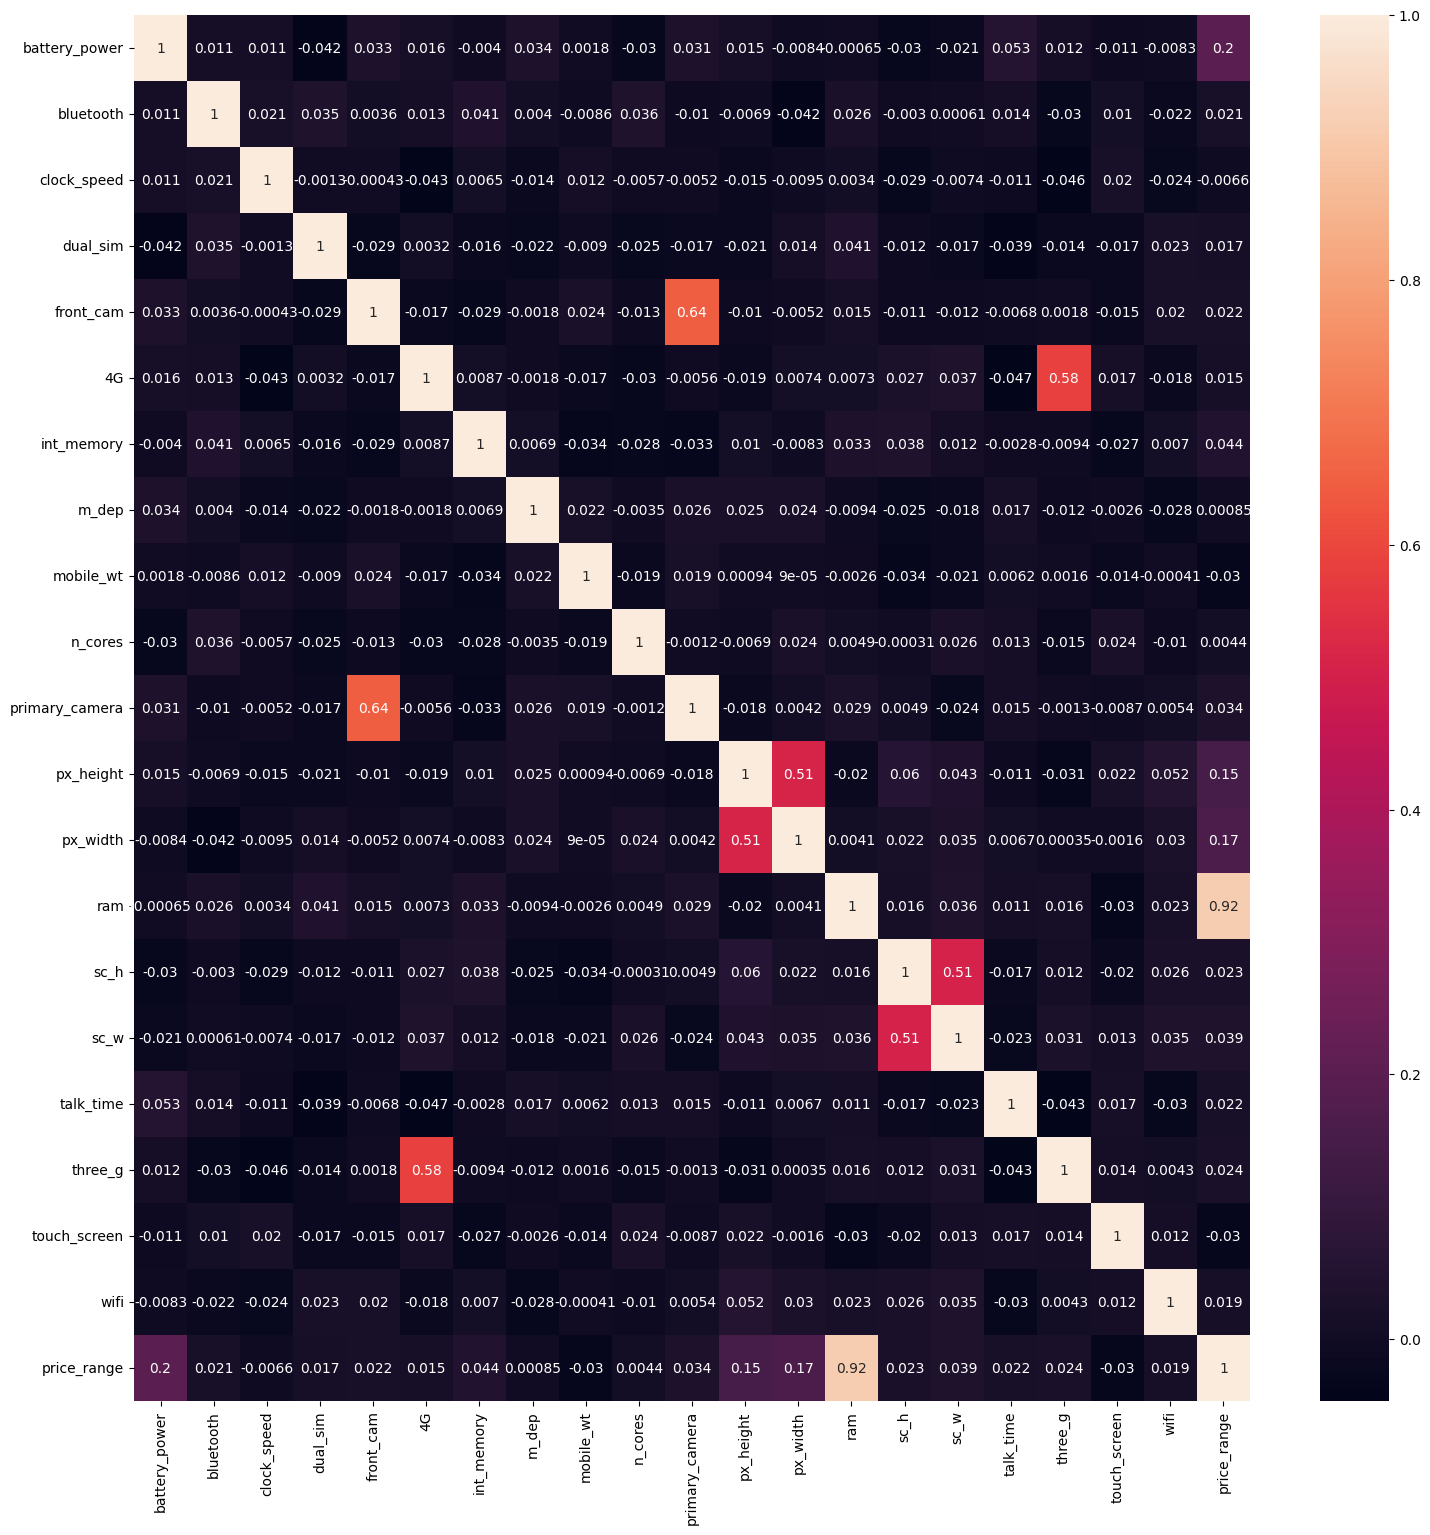

In [ ]:
plt.subplots(figsize = (18, 18))
sns.heatmap(df.corr(), annot = True)

In [ ]:
#checking for null values
df.isnull().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
#checking for duplicate
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1995,False
1996,False
1997,False
1998,False


In [ ]:
correlated_features = set()
correlation_matrix = df.corr()

In [ ]:
corr_cols_order = df.corr()['price_range'].sort_values(ascending=False).index
corr_cols_order

Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'primary_camera', 'three_g', 'sc_h', 'front_cam',
       'talk_time', 'bluetooth', 'wifi', 'dual_sim', '4G', 'n_cores', 'm_dep',
       'clock_speed', 'mobile_wt', 'touch_screen'],
      dtype='object')

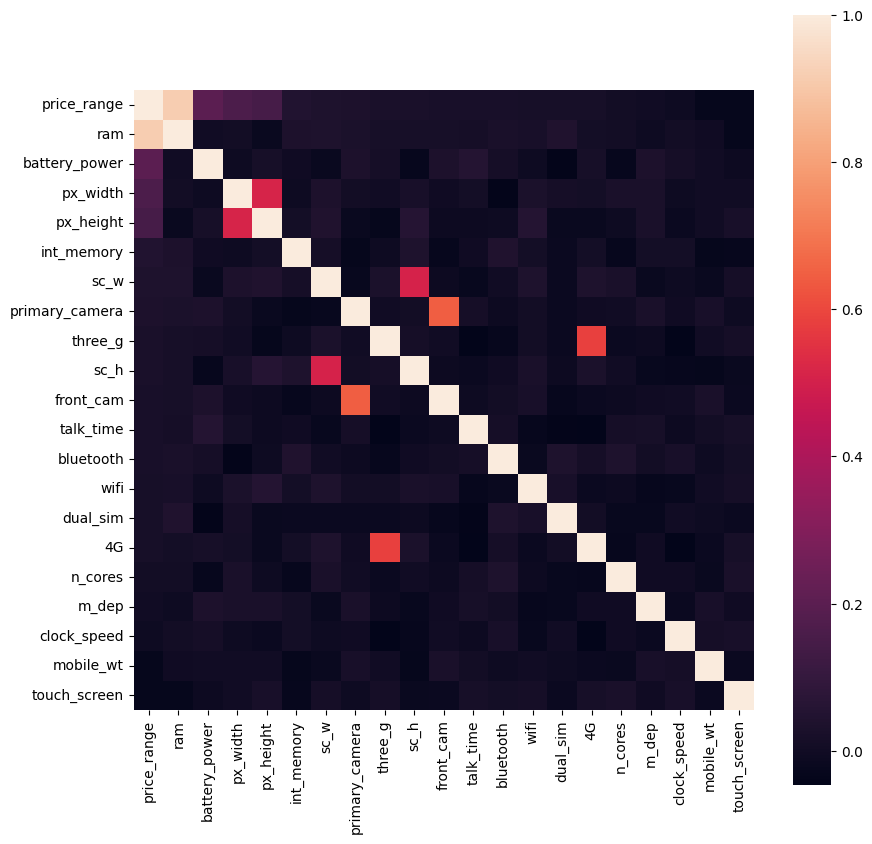

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[corr_cols_order].corr(), square=True)
plt.show()

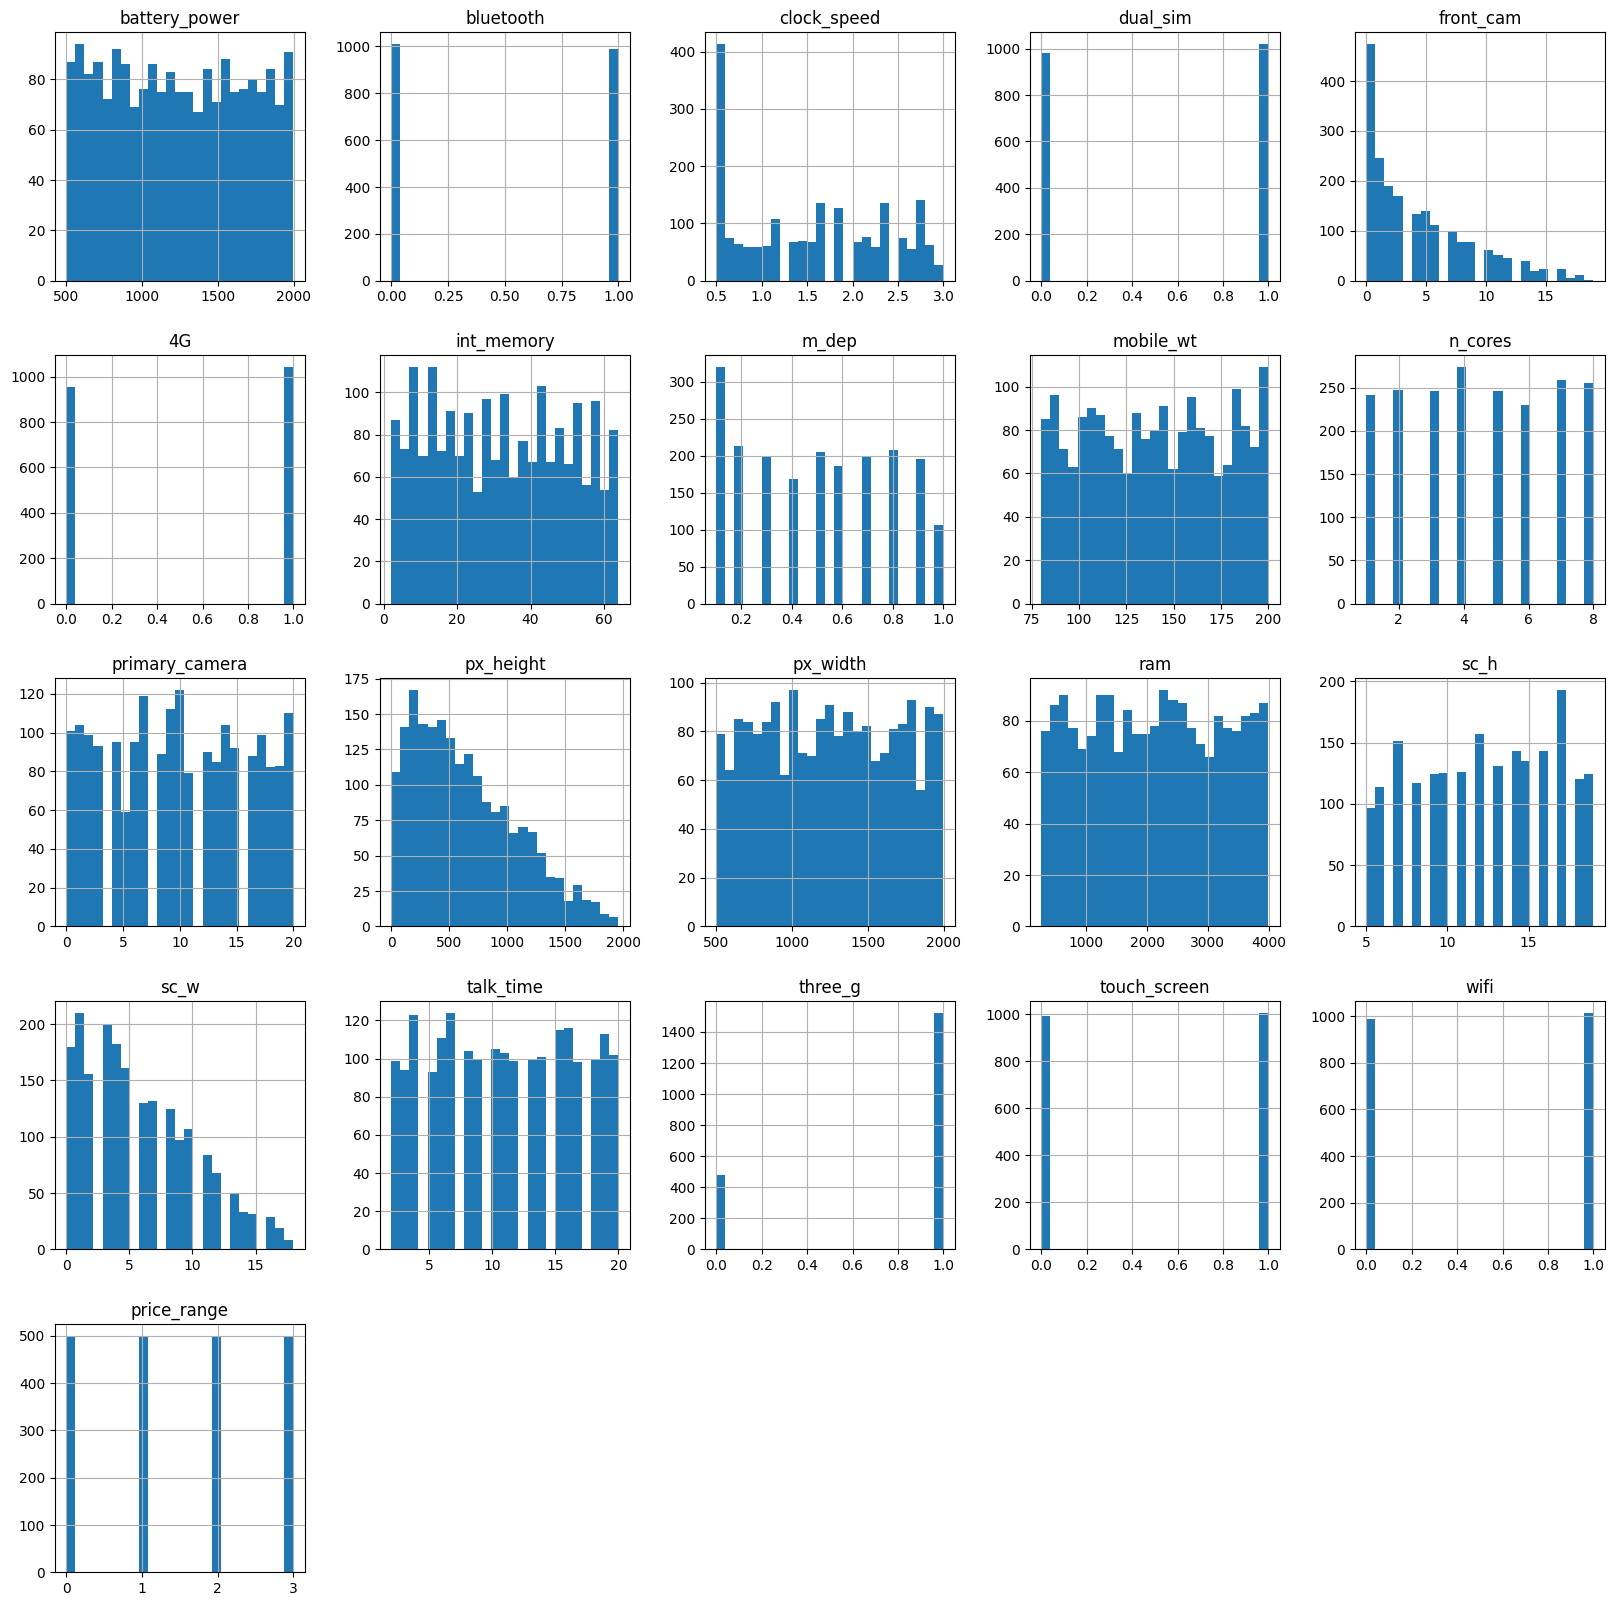

In [ ]:
# Visualization of the data
df.hist(bins=25,figsize=(20,20));

/tmp/ipython-input-21-2166027321.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['px_height'], color="#f6dae4").set_title('px_height Interval')
/tmp/ipython-input-21-2166027321.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['px_width'], color="#f6dae4").set_title('px_width Interva

Text(0.5, 1.0, 'mobile_wt Interval')

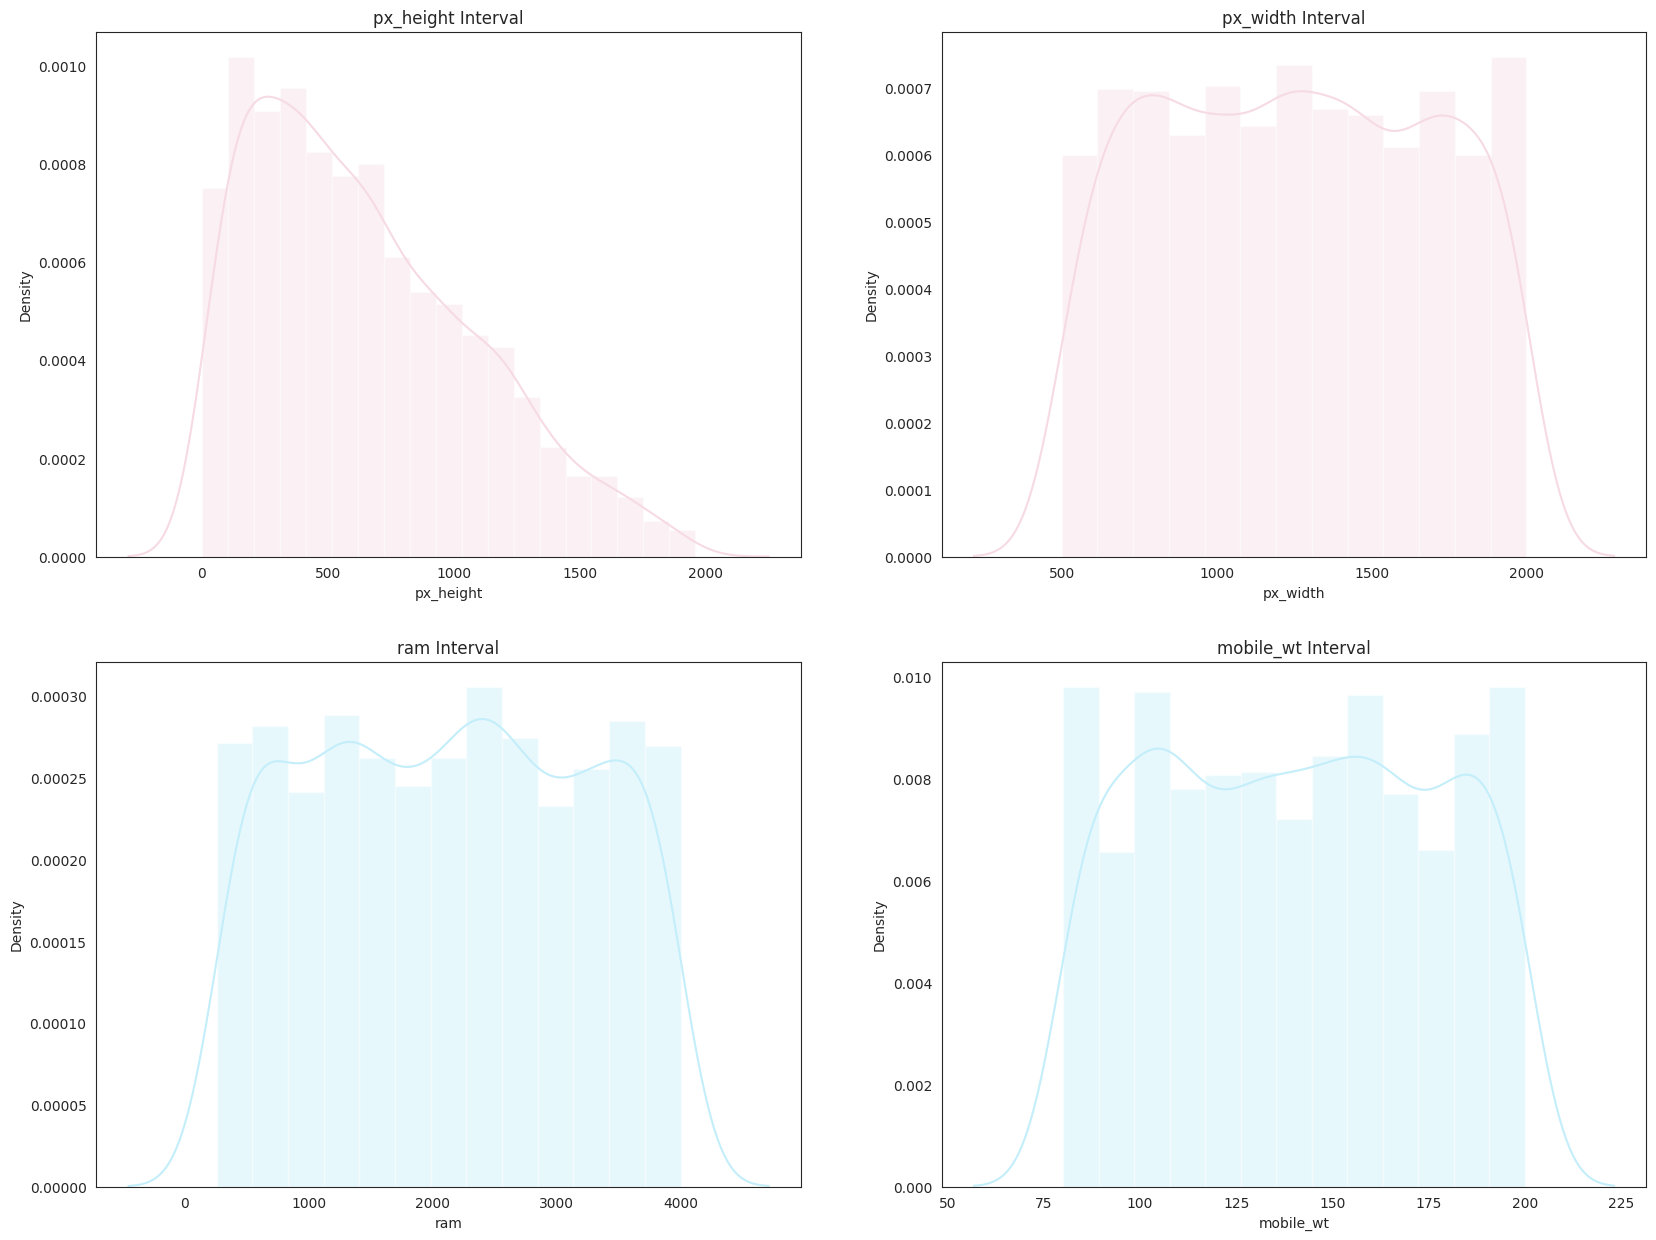

In [ ]:
plt.figure(figsize=(20,15))
sns.set_style('white')
plt.subplot(2,2,1)
sns.distplot(df['px_height'], color="#f6dae4").set_title('px_height Interval')
plt.subplot(2,2,2)
sns.distplot(df['px_width'], color="#f6dae4").set_title('px_width Interval')
plt.subplot(2,2,3)
sns.distplot(df['ram'], color="#c3eefa").set_title('ram Interval')
plt.subplot(2,2,4)
sns.distplot(df['mobile_wt'], color="#c3eefa").set_title('mobile_wt Interval')

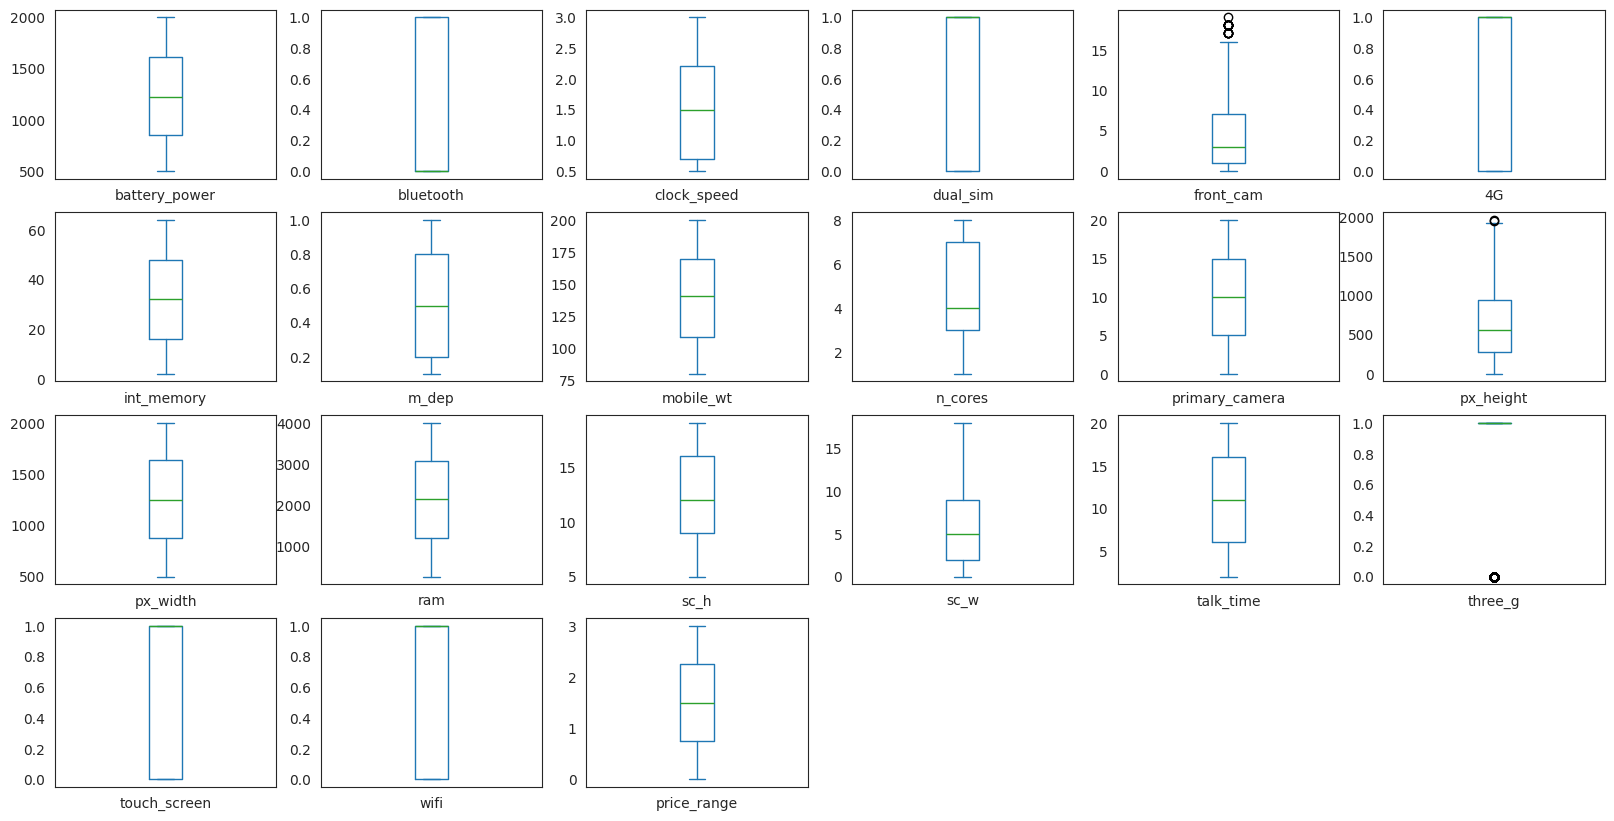

In [ ]:
df.plot(kind = "box" , subplots = True , layout= (7,6), figsize =(20,18) )
plt.show()

In [ ]:
# convert to numpy arrays and split features from labels
x = df.drop('price_range', axis=1).values
y =df['price_range'].values

In [ ]:
# Scale the data using StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [ ]:
# OneHot Encoding for labels
ohe = OneHotEncoder()
y= ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [ ]:
# Split the data into train and test datasets with ratio 9:1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
pip install keras-rectified-adam

  Preparing metadata (setup.py) ... done
  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.20.0-py3-none-any.whl size=8253 sha256=d2fc982dbb74fdc2fd825e9dc184c051093e6f7ee67555ce05b530d11230e233
  Stored in directory: /root/.cache/pip/wheels/db/4c/0d/1cdd142515ae041ea7a270d543b3efb6336587a8bd99c3aa6f
Successfully built keras-rectified-adam


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
L1L2_model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(4, activation='softmax')
])

L1L2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = L1L2_model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=0)

L1L2_model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9962 - loss: 0.1536 


[0.15889239311218262, 0.9900000095367432]

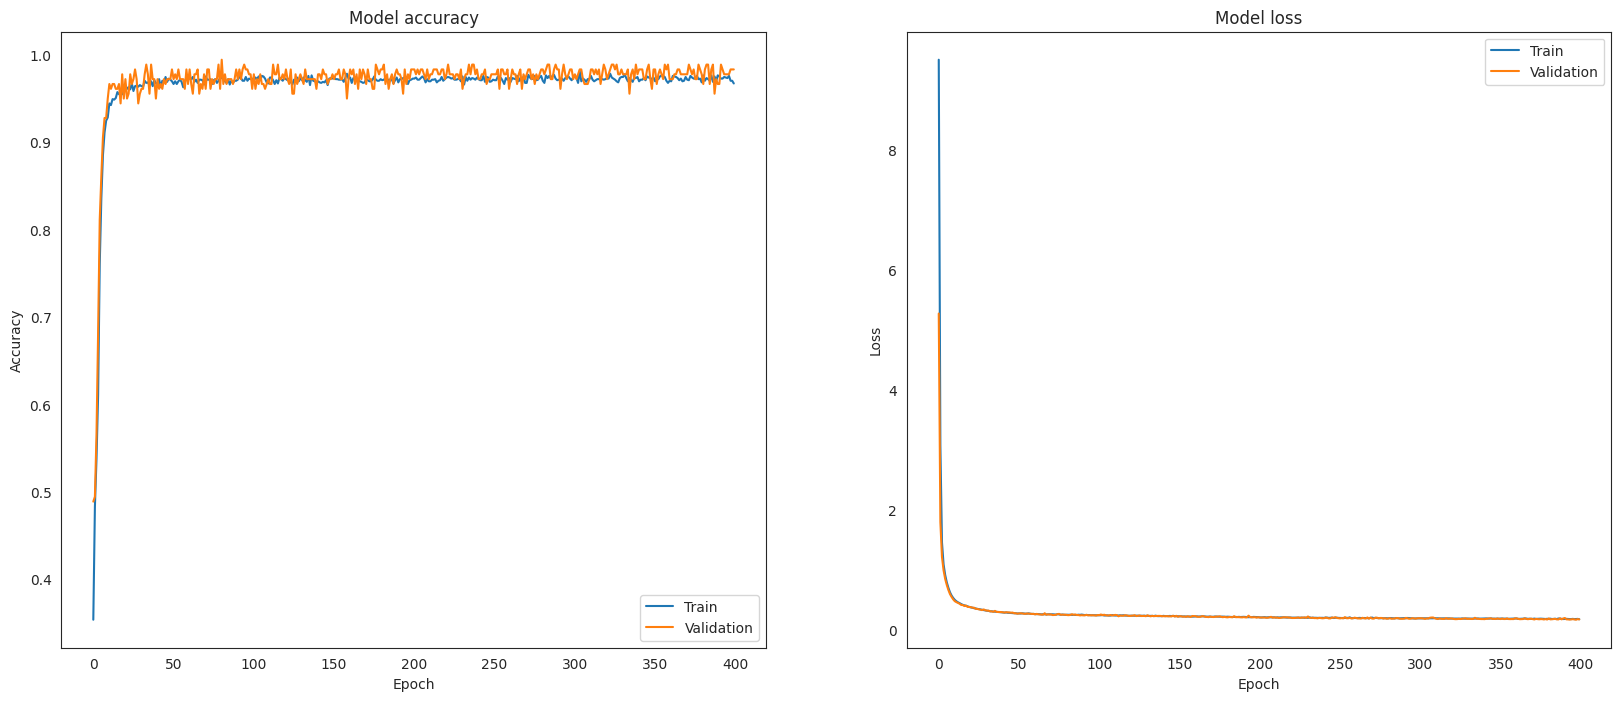

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'])

# Loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'])

plt.show()

In [ ]:
# Batch Normalization without regularizer
model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=0)

model.evaluate(x_test, y_test)

In [ ]:
model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=0)

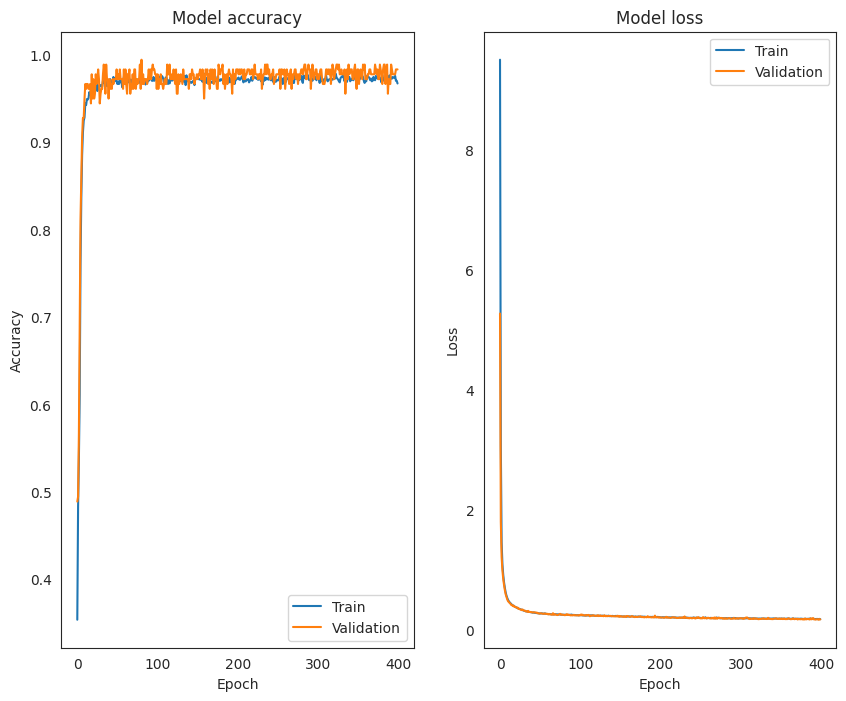

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'])

# Loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'])

plt.show()


In [ ]:
model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3076 - loss: 14.2912  


[14.305085182189941, 0.2849999964237213]

In [ ]:
y_predict = L1L2_model.predict(x_test)

predictions = list()
for i in range(len(y_predict)):
    predictions.append(np.argmax(y_predict[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.96      1.00      0.98        47
           2       1.00      0.96      0.98        48
           3       1.00      1.00      1.00        58

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [ ]:
y_predict = L1L2_model.predict(x)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
predictions = []

for i in range(len(y_predict)):
    predictions.append(np.argmax(y_predict[i]))

predictions[0:10]